In [2]:
from scipy import signal
import numpy as np
from scipy.fftpack import fft, ifft
import pandas as pd

import matplotlib
matplotlib.use('nbagg')
from pylab import rcParams
rcParams['figure.figsize'] = 9, 4
import matplotlib.pyplot as plt
import scipy

%load_ext autoreload
%autoreload 2
import sys
import copy

from pyha import Hardware, simulate, sims_close, Complex, resize, hardware_sims_equal
from pathlib import Path
from data import load_iq

def imshow(im):
    from skimage.exposure import exposure
    p2, p98 = np.percentile(im, (2, 98))
    im = exposure.rescale_intensity(im, in_range=(p2, p98))

    
    plt.imshow(im, interpolation='nearest', aspect='auto', origin='lower')
    plt.tight_layout()
    plt.show()
    
    
def snr(pure, noisy):
    sig_pow = np.mean(np.abs(pure))
    error = np.array(pure) - np.array(noisy)
    err_pow = np.mean(np.abs(error))
    
    snr_db = 20*np.log10(sig_pow/err_pow)
    return snr_db

# from under_construction.fft.bit_reversal_fftshift import bit_reversed_indexes
# from under_construction.fft.fft_core import R2SDF
# from under_construction.fft.packager import DataWithIndex, unpackage, package

def show_freqz(taps):
    w, h = scipy.signal.freqz(taps)
    fig, ax1 = plt.subplots(1, 1)
    plt.title('Digital filter frequency response')
    ax1.plot(w / np.pi, 20 * np.log10(abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Frequency')
    plt.grid()
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w / np.pi, angles, 'g')
    ax2.set_ylabel('Angle (radians)', color='g')
    ax2.axis('tight')
    plt.tight_layout()
    plt.show()
    
def show_plot():
    plt.tight_layout()
    plt.grid()
    if plt.gca().get_legend_handles_labels() != ([], []):
        plt.legend()
    plt.show()
from pyha import Hardware, simulate, sims_close, Complex, Sfix

from pyha.common.float import Float

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
fft_size = 1024 * 2 * 2 * 2

In [45]:
hann = np.hamming(fft_size)
fix9 = np.array([float(Float(x)) for x in  hann])
fix8 = np.array([float(Float(x, 5, 8)) for x in  hann])
fix7 = np.array([float(Float(x, 5, 7)) for x in  hann])

/home/gaspar/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Float.__float__ returned non-float (type numpy.float64).  The ability to return an instance of a strict subclass of float is deprecated, and may be removed in a future version of Python.
  
/home/gaspar/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Float.__float__ returned non-float (type numpy.float64).  The ability to return an instance of a strict subclass of float is deprecated, and may be removed in a future version of Python.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gaspar/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Float.__float__ returned non-float (type numpy.float64).  The ability to return an instance of a strict subclass of float is deprecated, and may be removed in a future version of Python.
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


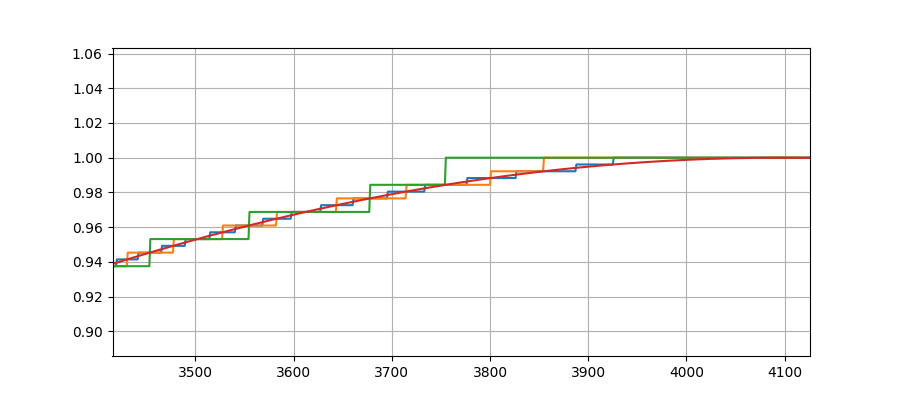

In [46]:
plt.plot(fix9)
plt.plot(fix8)
plt.plot(fix7)
plt.plot(hann)
plt.grid()
plt.show()

/home/gaspar/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6792: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


<IPython.core.display.Javascript object>


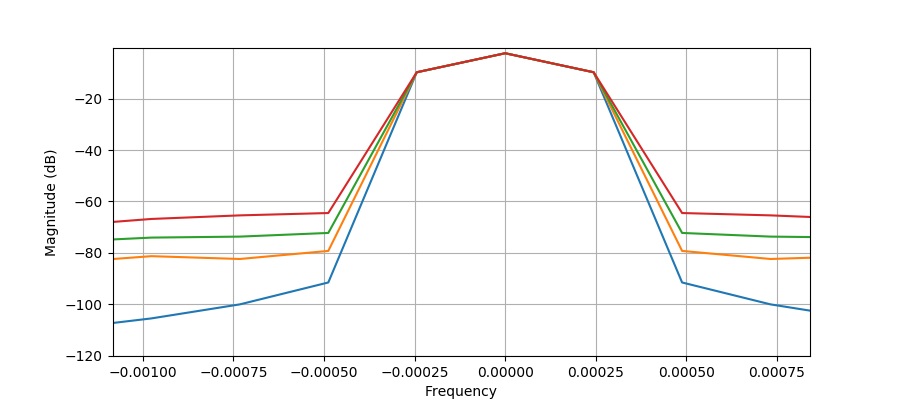

In [47]:
plt.magnitude_spectrum(hann + hann*1j, window=matplotlib.mlab.window_none, scale='dB')
plt.magnitude_spectrum(fix9 + fix9*1j, window=matplotlib.mlab.window_none, scale='dB')
plt.magnitude_spectrum(fix8 + fix8*1j, window=matplotlib.mlab.window_none, scale='dB')
plt.magnitude_spectrum(fix7 + fix7*1j, window=matplotlib.mlab.window_none, scale='dB')

plt.grid()
plt.show()

In [6]:
dut = R2SDF(fft_size)
sims = simulate(dut, sig, simulations=['PYHA'], output_callback=unpackage, input_callback=package)

INFO:sim:Converting model to hardware types ...
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 16384/16384 [00:27<00:00, 598.50it/s]

INFO:sim:OK!


INFO:sim:Simulations completed!


In [29]:
def bit_reverse(x, n_bits):
    return int(np.binary_repr(x, n_bits)[::-1], 2)

def bit_reversed_indexes(N):
    return [bit_reverse(i, int(np.log2(N))) for i in range(N)]

pyh = np.array(sims['PYHA'][0])
pyh = pyh[bit_reversed_indexes(fft_size)]
pyh = np.fft.fftshift(pyh)
pyh = np.abs(pyh)
pyh = pyh / pyh.max()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


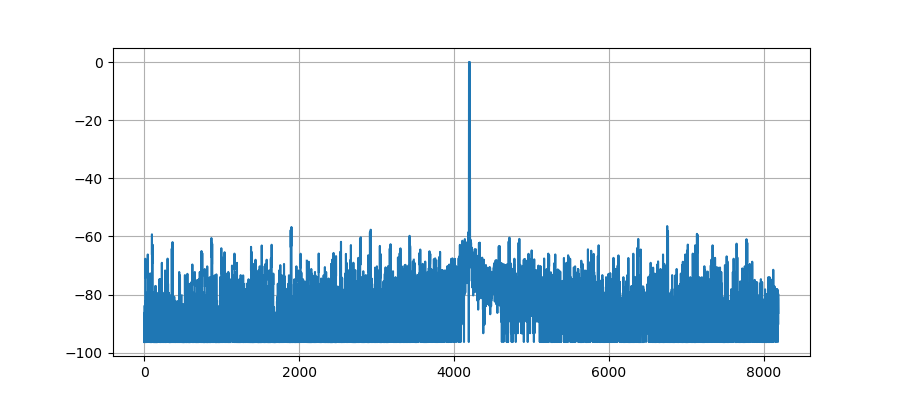

In [30]:
a = 20 * np.log10(pyh)
plt.plot(a)
# plt.magnitude_spectrum(sig, window=matplotlib.mlab.window_none, scale='dB')
plt.grid()
plt.show()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


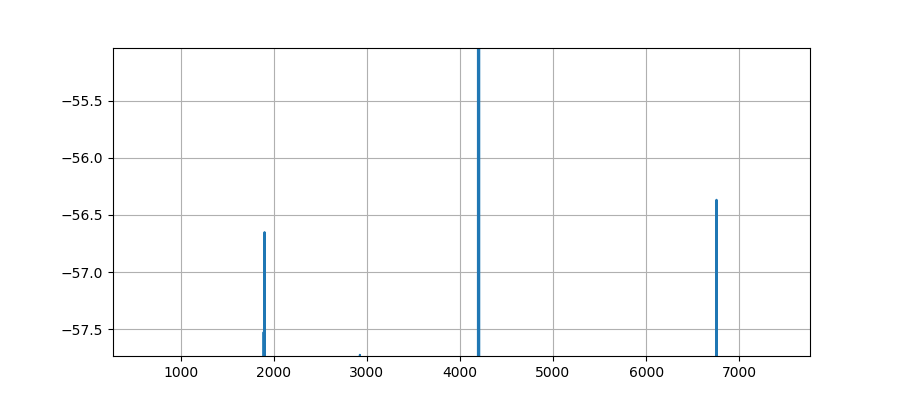

In [24]:
a = 20 * np.log10(pyh)
plt.plot(a)
# plt.magnitude_spectrum(sig, window=matplotlib.mlab.window_none, scale='dB')
plt.grid()
plt.show()

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


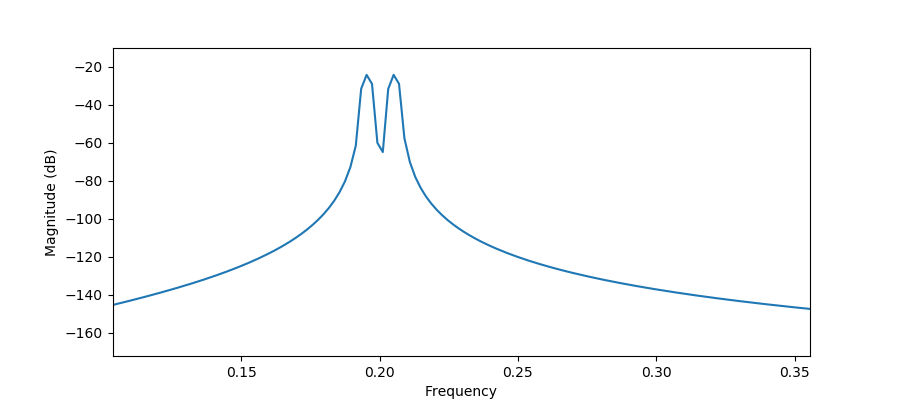

In [64]:
plt.magnitude_spectrum(sig, window=matplotlib.mlab.window_none, scale='dB')
plt.show()

In [ ]:
M = 1024 * 8
hann = np.hanning(M)
# hann = hann / hann.max()
hann_fix18 = np.array([Sfix(x, 0, -17, round_style='round', overflow_style='saturate').val for x in hann])
hann_fix9 = np.array([Sfix(x, 0, -8, round_style='round', overflow_style='saturate').val for x in hann])

In [ ]:
plt.plot(hann)
plt.plot(hann_fix18)
plt.plot(hann_fix9)
show_plot()

In [ ]:
fft_size = 1024